In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as svm
from IPython.display import display
import sympy as sp
from itertools import product
sp.init_printing()
%matplotlib inline

## Roberto Cai / Torsten Jandt / Djordje Vukcevic


In [2]:
def generate_dataset(radius, w, min_angle, max_angle, num_samples = 1000, 
                     center = [0,0], noise=False):
    samples = []
    if noise:
        n_x, n_y = np.random.random(2)*0.5
    else:
        n_x, n_y = 0, 0
    for i in range(num_samples):
        r = radius - (w/2) + np.random.random(1)*w
        angle = np.deg2rad(min_angle + np.random.random(1)*(max_angle - min_angle))
        x = center[0] + r*np.cos(angle) + n_x
        y = center[1] + r*np.sin(angle) + n_y
        samples.append([x[0],y[0]])
    return np.asarray(samples)

def format_data(data1, data2, num_samples=500):
    data1 = np.hstack((data1, np.ones((len(data1),1))))
    data2 = np.hstack((data2, -np.ones((len(data2),1))))
    samples = []
    samples = np.vstack((data1,data2))
    return samples

def plot_data(train_a, train_b):

    plt.plot(train_a[:,0],train_a[:,1],'bo')
    plt.plot(train_b[:,0],train_b[:,1],'ro')
    plt.axis('equal')
    plt.grid(True)
    plt.title('Training data', fontsize=20)
    plt.show()

def classification(clf, kernel, radius, w, r, distance, angle_a, angle_b, 
                   num_train, num_test, axarr):

    for idx, d in zip(product([0, 1, 2], [0, 1]), 
                      range(len(distance))):
        noise=False
        if d == 5:
            noise=True
        train_a = generate_dataset(radius, w, angle_a[0], angle_a[1], 
                                   num_train, [0,0], noise)
        train_b = generate_dataset(radius, w, angle_b[0], angle_b[1], 
                                   num_train, [r,distance[d]], noise)
        test_a = generate_dataset(radius, w, angle_a[0], angle_a[1], 
                                  num_test, [0,0])
        test_b = generate_dataset(radius, w, angle_b[0], angle_b[1], 
                                  num_test, [r,distance[d]])

        training_data = format_data(train_a, train_b)

        test_data = format_data(test_a, test_b)

        X = training_data[:,0:2]
        y = training_data[:,2]
        
        clf.fit(X, y)

        test = test_data[:,0:2]
        test_label = test_data[:,2]
        prediction = clf.predict(test)
        
        score = clf.score(test, test_label)
        print(score)
        
        x_min, x_max = -20, 30
        y_min, y_max = -20, 20
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(test[:,0], test[:,1], c=prediction, 
                                      cmap=plt.cm.coolwarm)
        if noise:
            axarr[idx[0], idx[1]].set_title(
                '{} Kernel, d={}, Accuracy={}%, with noise'
                .format(kernel,distance[d],np.round(score*100,2)), 
                fontsize=20)
        else:
            axarr[idx[0], idx[1]].set_title(
                '{} Kernel, d={}, Accuracy={}%'
                .format(kernel,distance[d],np.round(score*100,2)), 
                fontsize=20)
        axarr[idx[0], idx[1]].grid(True)
    plt.show()

radius = 10
w = 4
r = 10
distance = [-3, 0, 3, 8, 9, 9]
angle_a = [0,180]
angle_b = [180,360]
num_train = 500 # number of training points for each class 
num_test = 1000 # number of test points for each class

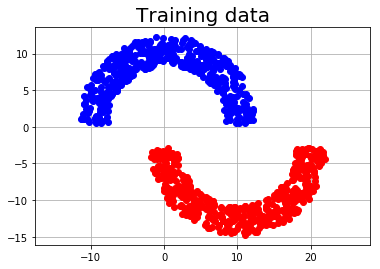

In [3]:
train_a = generate_dataset(radius, w, angle_a[0], angle_a[1], 
                           num_train, [0,0], True)
train_b = generate_dataset(radius, w, angle_b[0], angle_b[1], 
                           num_train, [10,-3], True)
plot_data(train_a, train_b)

1.0
0.996
0.9355
0.8185
0.799
0.789


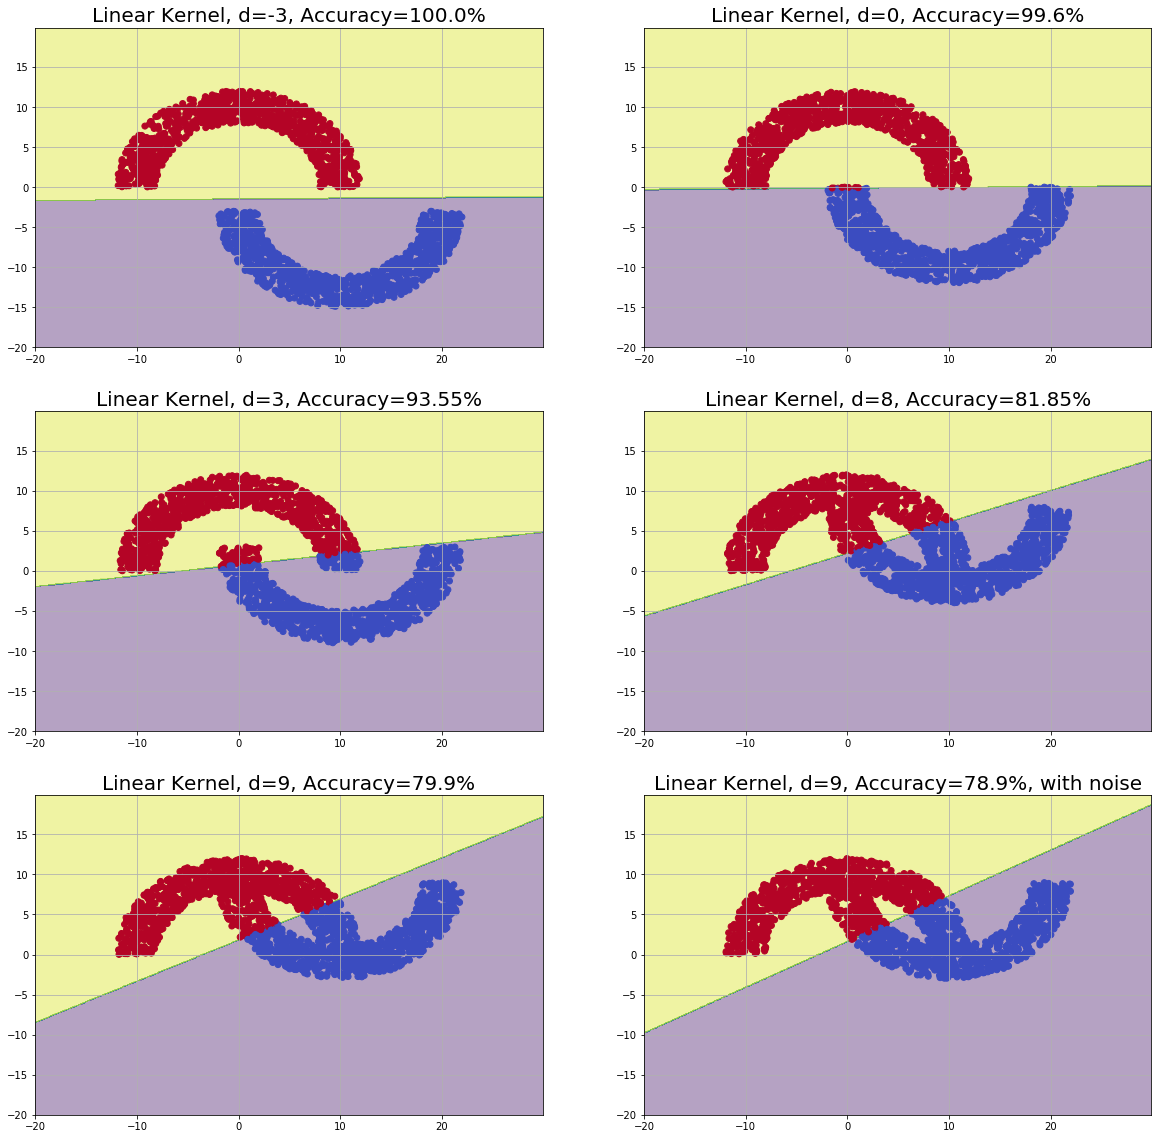

In [4]:
f, axarr = plt.subplots(3, 2,figsize=(20,20))
C = 1  # SVM regularization parameter
kernel='Linear'
# SVC with linear kernel
linear_svc = svm.SVC(kernel='linear', C=C)
classification(linear_svc, kernel, radius, w, 
               r, distance, angle_a, angle_b, 
               num_train, num_test, axarr)

1.0
1.0
1.0
0.993
0.954
0.9565


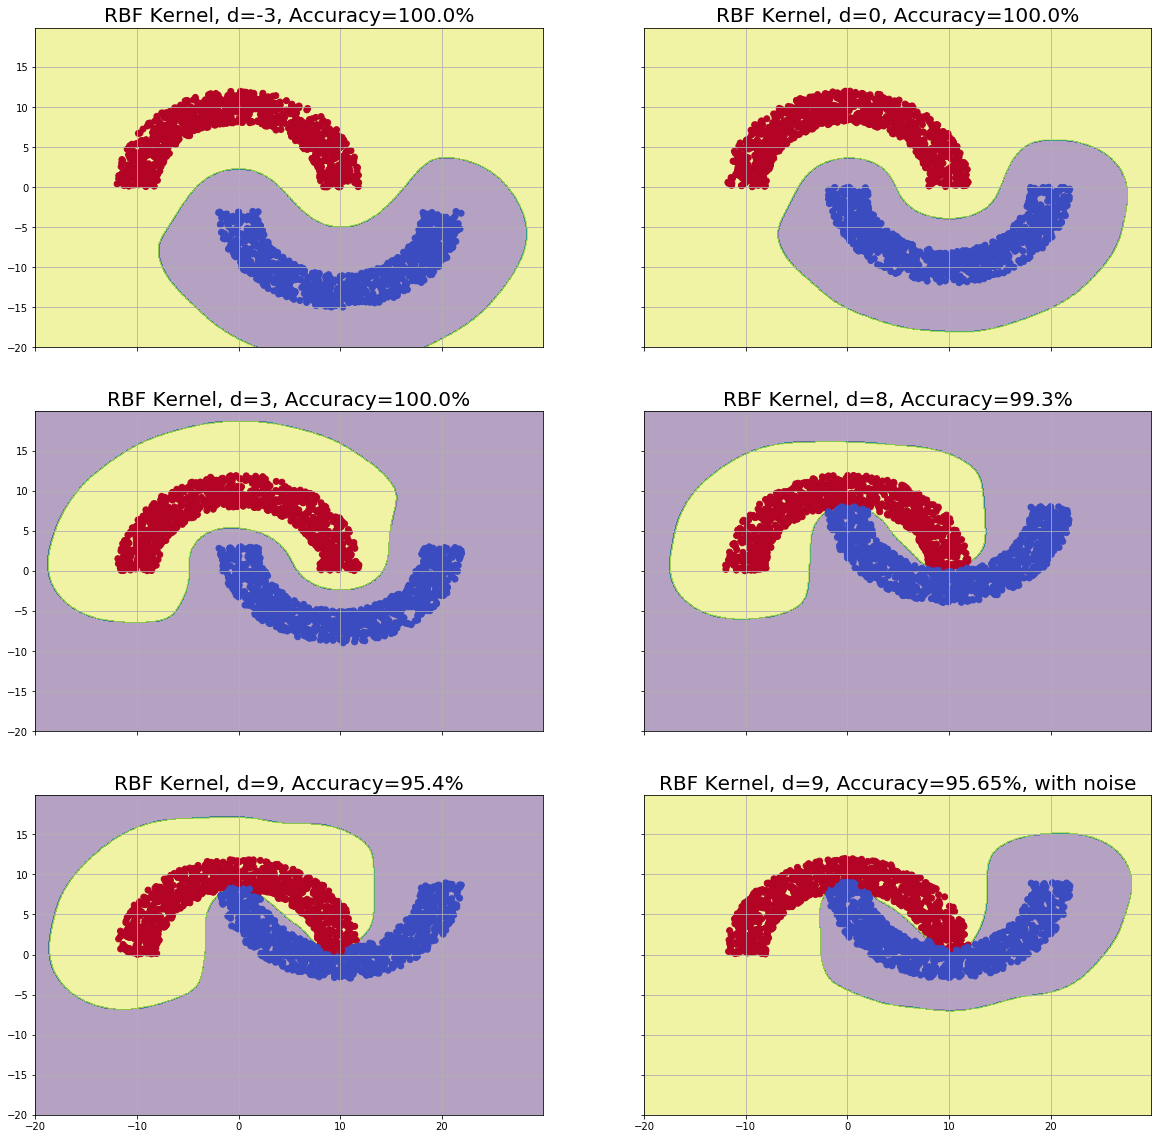

In [5]:

f, axarr2 = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(20,20))
kernel='RBF'
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C)
classification(rbf_svc, kernel, radius, w, 
               r, distance, angle_a, angle_b, 
               num_train, num_test, axarr2)

1.0
1.0
1.0
0.9905
0.9705
0.95


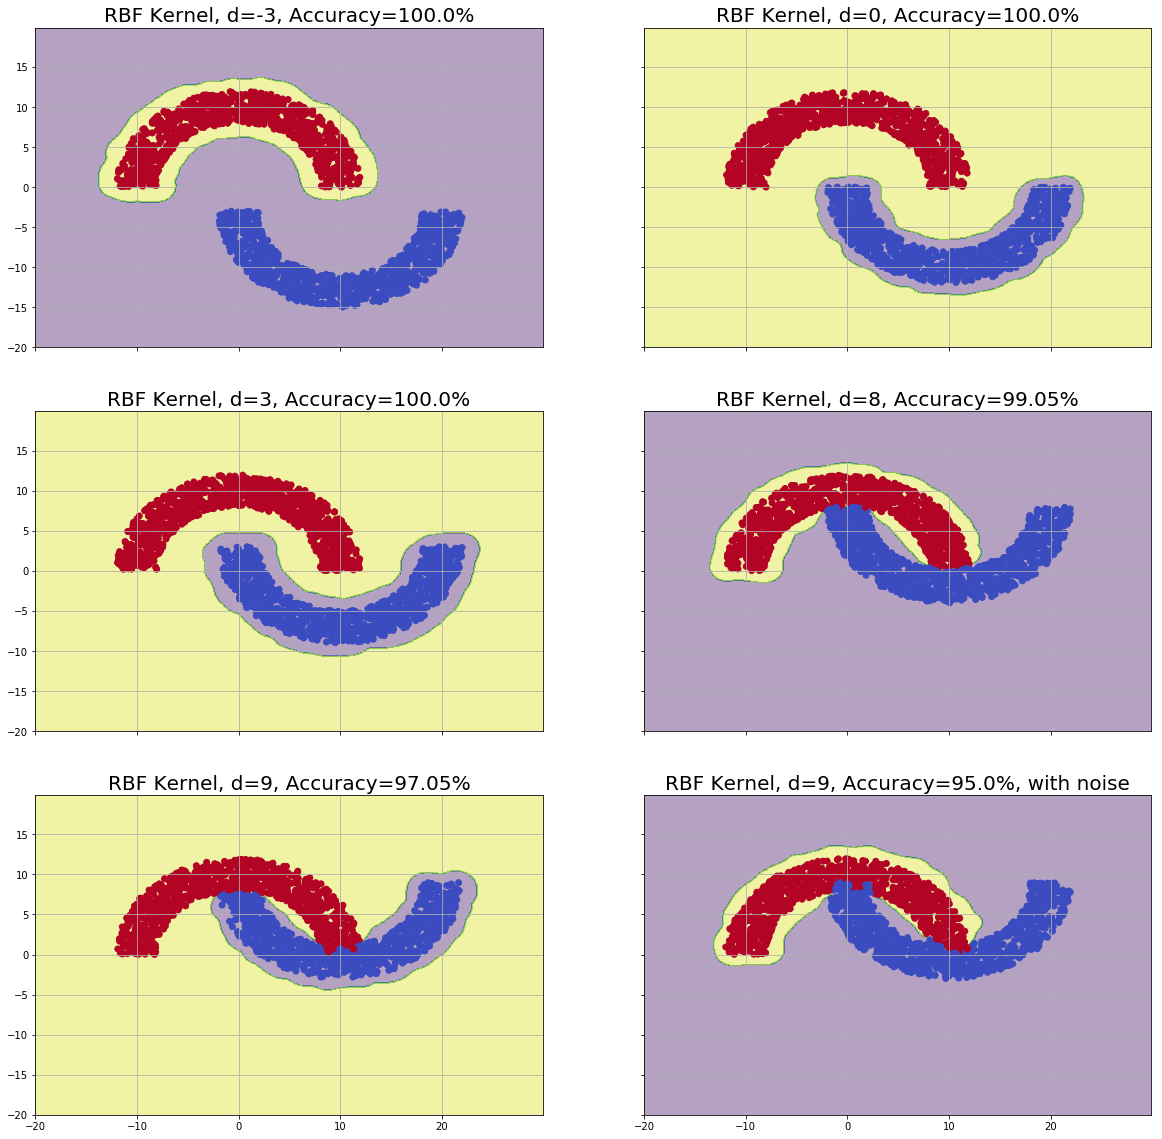

In [6]:

f, axarr2 = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(20,20))
kernel='RBF'
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=1.5, C=C)
classification(rbf_svc, kernel, radius, w, 
               r, distance, angle_a, angle_b, 
               num_train, num_test, axarr2)

1.0
1.0
1.0
0.991
0.9635
0.9505


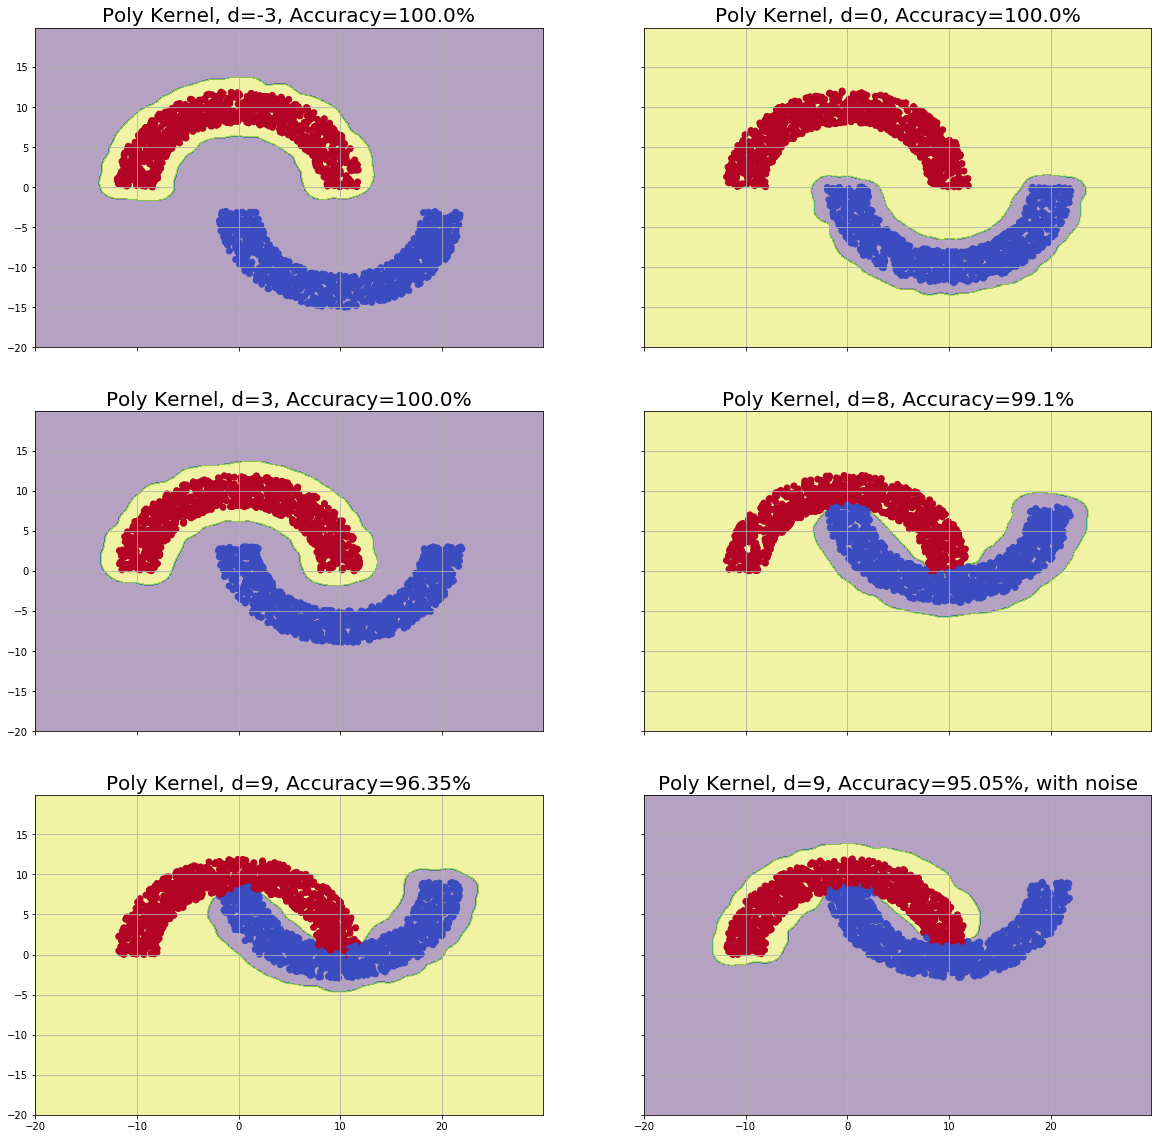

In [7]:
f, axarr3 = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(20,20))
kernel='Poly'
# SVC with polynomial (degree 2) kernel
poly_svc = svm.SVC(kernel='poly', degree=2, C=C, coef0=1.0)
classification(rbf_svc, kernel, radius, w, 
               r, distance, angle_a, angle_b, 
               num_train, num_test, axarr3)

1.0
1.0
1.0
0.9935
0.9635
0.947


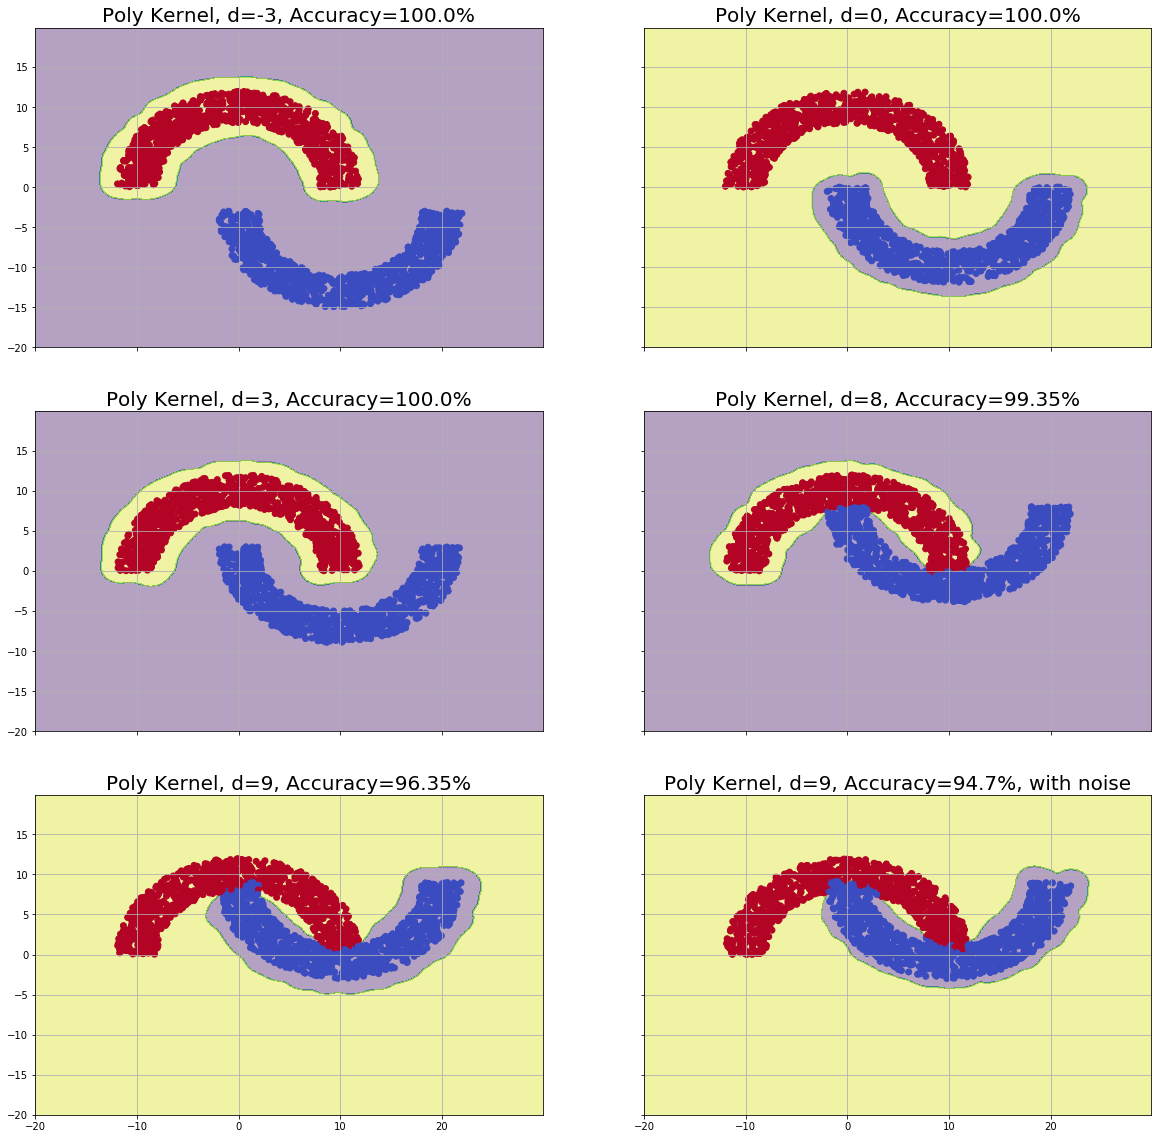

In [8]:
f, axarr3 = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(20,20))
kernel='Poly'
# SVC with polynomial (degree 4) kernel
poly_svc = svm.SVC(kernel='poly', degree=4, C=C, coef0=1.0)
classification(rbf_svc, kernel, radius, w, 
               r, distance, angle_a, angle_b, 
               num_train, num_test, axarr3)